Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


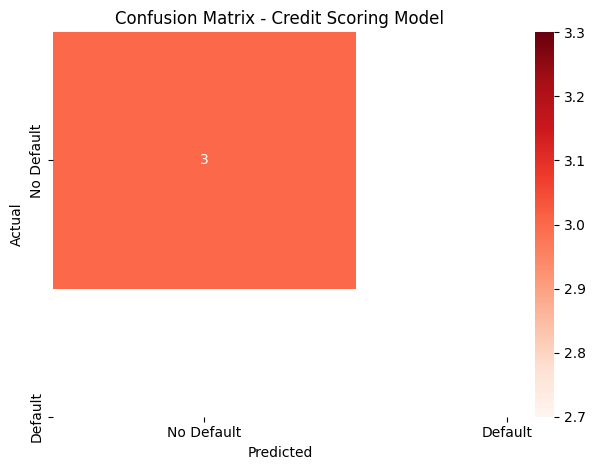

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Simulated credit applicant dataset
data = {
    'Age': [25, 35, 45, 50, 23, 31, 60, 40, 29, 52],
    'Income': [30000, 60000, 80000, 72000, 25000, 40000, 90000, 55000, 38000, 85000],
    'LoanAmount': [10000, 15000, 20000, 18000, 5000, 12000, 25000, 16000, 11000, 23000],
    'CreditHistory': ['Good', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Bad'],
    'EmploymentStatus': ['Employed', 'Self-employed', 'Unemployed', 'Employed', 'Unemployed',
                         'Employed', 'Retired', 'Self-employed', 'Employed', 'Unemployed'],
    'Default': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

# Encode categorical features
le = LabelEncoder()
df['CreditHistory'] = le.fit_transform(df['CreditHistory'])  # Good=1, Bad=0
df['EmploymentStatus'] = le.fit_transform(df['EmploymentStatus'])
df['Default'] = le.fit_transform(df['Default'])  # No=0, Yes=1

# Features and target
X = df.drop('Default', axis=1)
y = df['Default']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title("Confusion Matrix - Credit Scoring Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()